# Analysis for RNA-DNA p-brain tissue sample

2021-04-23 smRNA and 04-26 CTP-09 MOP marker gene DNA-MERFISH

by Pu Zheng

2020.04.30

# 0. required packages for h5py

In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

16200


# 1. Create field-of-view class

In [3]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':[r'\\10.245.74.212\Chromatin_NAS_3\20210426-P_Forebrain_CTP09_from0423RNA',
                            r'\\10.245.74.158\Chromatin_NAS_4\20210426-P_Forebrain_CTP09_from0423RNA'],
             'save_folder':r'D:\Pu_Temp\20210426-P_Forebrain_CTP-09',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 15,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210501-Corrections_2color_40',
             'shared_parameters':{
                     'single_im_size':[40,2048,2048],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':500,
                     'max_num_seeds': 2500,
                     'spot_seeding_th':150,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

In [4]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=2,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 32
- Number of field of views: 108
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 32
- Number of field of views: 108
- Importing csv file: \\10.245.74.212\Chromatin_NAS_3\20210426-P_Forebrain_CTP09_from0423RNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: D:\Pu_Temp\20210426-P_Forebrain_CTP-09\Conv_zscan_002.hdf5
++ base attributes loaded:['dapi_im', 'ref_im'] in 1.644s.
+ loading correction from file: D:\Pu_Temp\20210426-P_Forebrain_CTP-09\Conv_zscan_002.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmen

## 2. Process image into candidate spots

In [9]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('combo', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 64 folders
+ load reference image from file:\\10.245.74.212\Chromatin_NAS_3\20210426-P_Forebrain_CTP09_from0423RNA\H0R0\Conv_zscan_002.dax
- correct the whole fov for image: \\10.245.74.212\Chromatin_NAS_3\20210426-P_Forebrain_CTP09_from0423RNA\H0R0\Conv_zscan_002.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.212\Chromatin_NAS_3\20210426-P_Forebrain_CTP09_from0423RNA\H0R0\Conv_zscan_002.dax  in 8.851s
-- removing hot pixels for channels:['488'] in 7.295s
-- illumination correction for channels: 488, in 1.800s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 18.446s
-- saving fov_info to file: D:\Pu_Temp\20210426-P_Forebrain_CTP-09\Conv_zscan_002.hdf5
++ base attributes saved:['ref_im'] in 4.006s.
-- checking combo, region:[1 2] in 0.004s.
-- checking combo, region:[3 4] in 0.003s.
-- checking combo, reg

In [10]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 64 folders
-- checking unique, region:[121 122] in 0.043s.
-- checking unique, region:[123 124] in 0.003s.
-- checking unique, region:[125 126] in 0.002s.
-- checking unique, region:[127 128] in 0.002s.
-- checking unique, region:[129 130] in 0.002s.
-- checking unique, region:[131 132] in 0.003s.
-- checking unique, region:[133 134] in 0.003s.
-- checking unique, region:[135 136] in 0.003s.
-- checking unique, region:[137 138] in 0.003s.
-- checking unique, region:[139 140] in 0.003s.
-- checking unique, region:[141 142] in 0.003s.
-- checking unique, region:[143 144] in 0.003s.
-- checking unique, region:[145 146] in 0.001s.
-- checking unique, region:[147 148] in 0.000s.
-- checking unique, region:[149 150] in 0.000s.
-- checking unique, region:[151 152] in 0.010s.
-- checking unique, region:[153 154] in 0.000s.
-- checking unique, region:[155 156] in 0.000s.
-- checking unique, region:[157 158] in 0.000s.
-- checking unique, region:[159 1

In [11]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('gene', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 64 folders
-- checking gene, region:[1 2] in 0.114s.
-- checking gene, region:[3 4] in 0.003s.
-- checking gene, region:[5] in 0.003s.
+ Start multi-processing of pre-processing for 3 images with 15 threads
++ processed gene ids: [1 2 3 4 5] in 863.96s.


In [6]:
fov._load_from_file('unique')
fov._load_from_file('combo')

+ loading unique from file: D:\Pu_Temp\20210426-P_Forebrain_CTP-09\Conv_zscan_002.hdf5
++ finish loading unique in 0.014s. 
+ loading combo from file: D:\Pu_Temp\20210426-P_Forebrain_CTP-09\Conv_zscan_002.hdf5
++ finish loading combo in 0.008s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1463: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [7]:
fov.unique_spots_list[0]
fov.combo_spots_list[0]

array([[ 1.06607363e+04,  1.35242853e+01,  7.13597778e+02, ...,
        -2.66307652e-01,  4.19888318e-01,  3.84116882e+02],
       [ 3.71198511e+03,  1.69072952e+01,  1.35882715e+03, ...,
         5.53526342e-01, -1.90799832e-01,  1.46601227e+02],
       [ 3.34093311e+03,  1.75139236e+01,  1.01576469e+02, ...,
        -2.28538096e-01,  4.19742376e-01,  1.10048386e+02],
       ...,
       [ 2.23461197e+02,  1.88581505e+01,  4.34317596e+02, ...,
        -3.66955668e-01, -2.88901061e-01,  2.09477005e+01],
       [ 1.50818192e+02,  1.89027386e+01,  7.44894165e+02, ...,
         1.00000000e+00, -5.02767563e-01,  3.09368553e+01],
       [ 1.79229965e+02,  8.59718227e+00,  1.16654175e+03, ...,
        -7.44678453e-02, -1.00000000e+00,  2.62706757e+01]], dtype=float32)

In [8]:
from scipy.spatial.distance import cdist
_rid = 1
int_th = 200
unique_spots = fov.unique_spots_list[_rid]
unique_spots = unique_spots[unique_spots[:,0] > int_th]
combo_spots = fov.combo_spots_list[_rid]
combo_spots = combo_spots[combo_spots[:,0] > int_th]

unique_hzxys = spot_tools.picking.convert_spots_to_hzxys(unique_spots, fov.shared_parameters['distance_zxy'])
combo_hzxys = spot_tools.picking.convert_spots_to_hzxys(combo_spots, fov.shared_parameters['distance_zxy'])

kept_uinds = np.where(cdist(unique_hzxys, combo_hzxys).min(1) < 500)[0]
kept_cinds = np.where(cdist(unique_hzxys, combo_hzxys).min(0) < 500)[0]


<IPython.core.display.Javascript object>


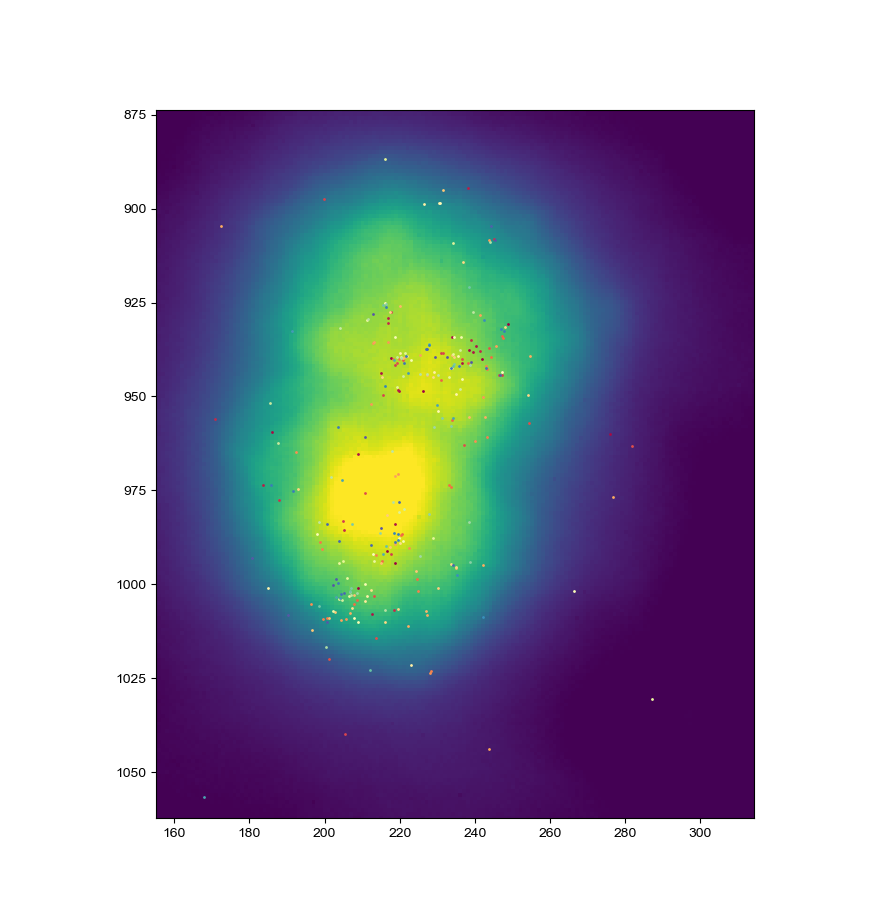

In [49]:
from matplotlib.cm import Spectral
int_th = 200

plt.figure(figsize=(4,4))
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(fov.dapi_im.mean(0), vmin=1000, vmax=5000)

for _rid, _uspots in enumerate(fov.unique_spots_list):
    
    unique_spots = fov.unique_spots_list[_rid]
    unique_spots = unique_spots[unique_spots[:,0] > int_th]
    combo_spots = fov.combo_spots_list[_rid]
    combo_spots = combo_spots[combo_spots[:,0] > int_th]

    unique_hzxys = spot_tools.picking.convert_spots_to_hzxys(unique_spots, fov.shared_parameters['distance_zxy'])
    combo_hzxys = spot_tools.picking.convert_spots_to_hzxys(combo_spots, fov.shared_parameters['distance_zxy'])

    kept_uinds = np.where(cdist(unique_hzxys, combo_hzxys).min(1) < 500)[0]
    kept_cinds = np.where(cdist(unique_hzxys, combo_hzxys).min(0) < 500)[0]

    _filtered_uspots = unique_spots[kept_uinds]
    _filtered_cspots = combo_spots[kept_cinds]
    #_filtered_uspots = _uspots[_uspots[:,0] > int_th]
    plt.plot(_filtered_uspots[:,3], _filtered_uspots[:,2], '.', markersize=2, color=Spectral(_rid/len(fov.unique_spots_list)))
    #plt.plot(_filtered_cspots[:,3], _filtered_cspots[:,2], '.', markersize=2, color=Spectral(_rid/len(fov.unique_spots_list)))

plt.show()

<IPython.core.display.Javascript object>


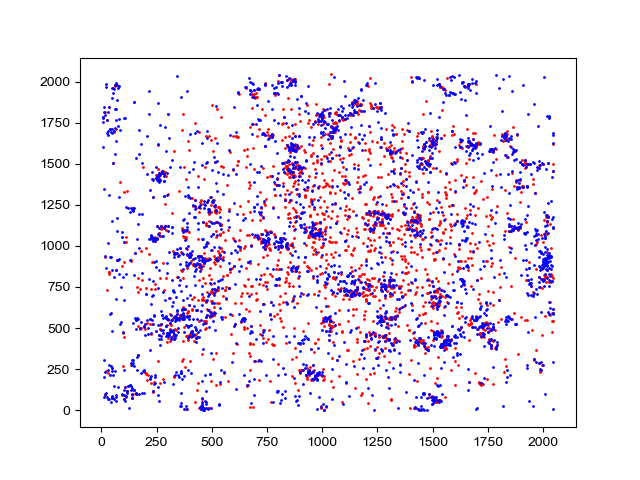

In [48]:
plt.figure()
plt.plot(unique_spots[:,2], unique_spots[:,3], 'r.', markersize=2)
plt.plot(combo_spots[:,2], combo_spots[:,3], 'b.', markersize=2)
plt.show()

In [44]:
vis_unique_inds = [0,1,2,3,4]
vis_unique_ims, vis_unique_ids, vis_unique_spot_list, vis_unique_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_inds:
        vis_unique_ims.append(_grp['ims'][_ind])
        vis_unique_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_unique_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


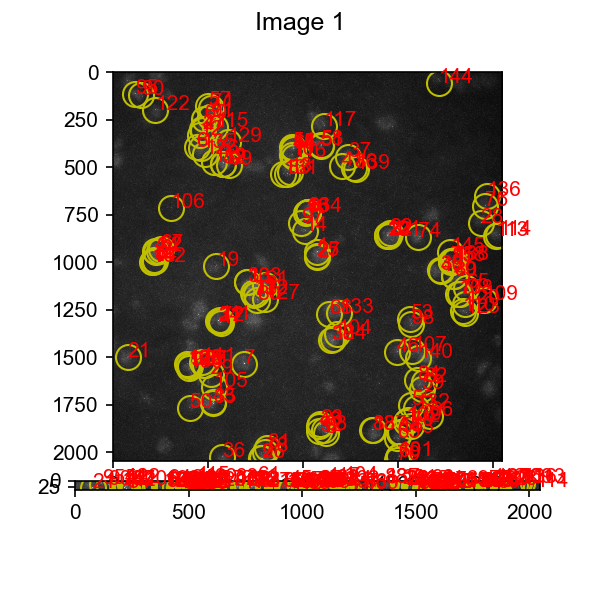

In [45]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_unique_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_unique_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [42]:
vis_combo_inds = [0,1,2,3,4]
vis_combo_ims, vis_combo_ids, vis_combo_spot_list, vis_combo_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    
    for _ind in vis_inds:
        vis_combo_ims.append(_grp['ims'][_ind])
        vis_combo_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_combo_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


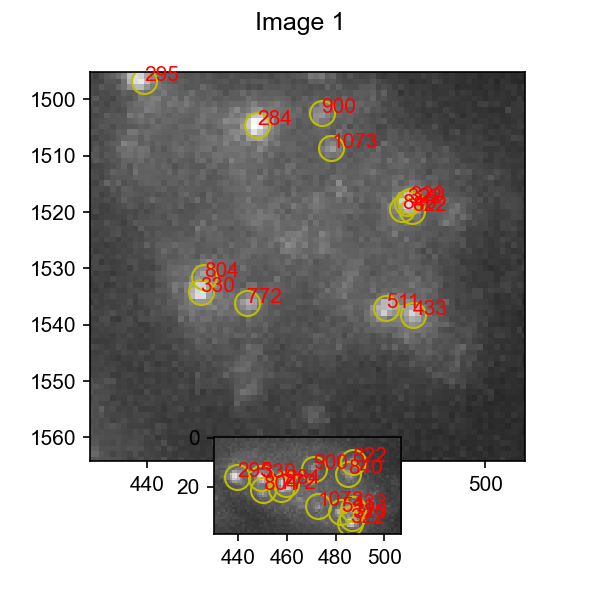

In [43]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_combo_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_combo_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [35]:
classes.batch_functions._color_dic_stat(fov.color_dic, fov.channels, fov.shared_parameters['allowed_data_types']).keys()

dict_keys(['combo', 'unique', 'gene'])

In [51]:
vis_gene_inds = [0,1,2,3,4]
vis_gene_ims, vis_gene_ids, vis_gene_spot_list, vis_gene_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    
    for _ind in vis_gene_inds:
        vis_gene_ims.append(_grp['ims'][_ind])
        vis_gene_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_gene_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


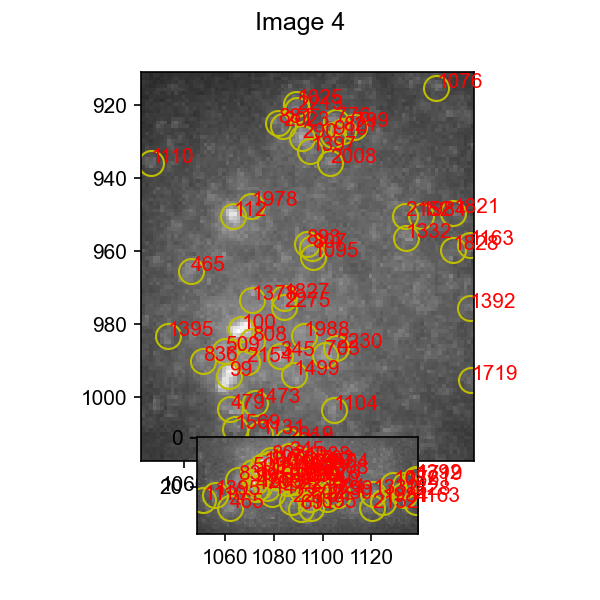

In [52]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_gene_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_gene_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

## Segmentation by Cellpose

In [7]:
import cv2
from cellpose import utils
from cellpose import models

In [8]:
model = models.Cellpose(gpu=True, model_type='nuclei')

** TORCH CUDA version installed and working. **
>>>> using GPU


In [9]:
dapi_im = fov._load_dapi_image()

directly return existing attribute.


<IPython.core.display.Javascript object>


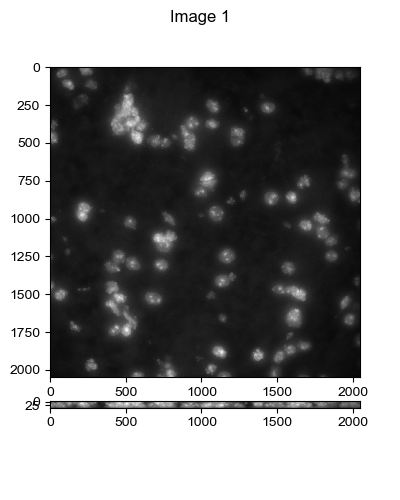

In [10]:
visual_tools.imshow_mark_3d_v2([dapi_im], )

In [87]:
# 2D segmentation
from cellpose import models
model_2d = models.Cellpose(gpu=True, model_type='nuclei')
masks_2d, flows_2d, styles_2d, diams_2d = model_2d.eval(fov.dapi_im[5:-5].max(0), 
                                                        diameter=60, channels=[0,0], 
                                                        min_size=20,
                                                        do_3D=False)

** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)


E:\Users\puzheng\anaconda3\lib\site-packages\torch\nn\functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


time spent: running network 0.97s; flow+mask computation 0.84
estimated masks for 1 image(s) in 2.02 sec
>>>> TOTAL TIME 2.02 sec


In [55]:
from skimage.segmentation import find_boundaries

In [57]:
find_boundaries(masks_2d)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

<IPython.core.display.Javascript object>


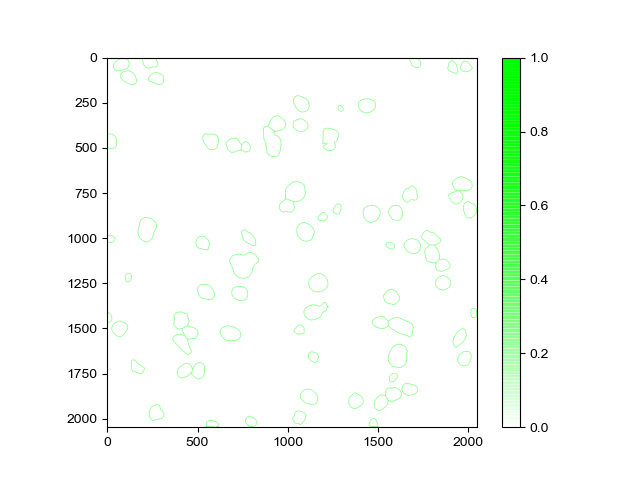

In [75]:
plt.figure()
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([0,1,0])
)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


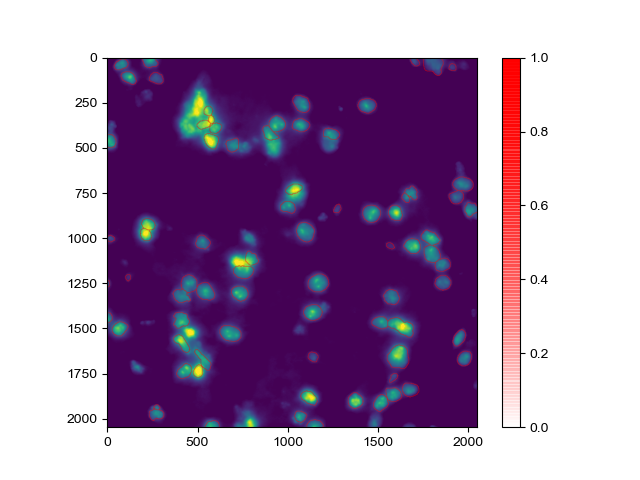

In [88]:
plt.figure()
plt.imshow(fov.dapi_im.mean(0), vmin=1000, vmax=5000)
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([1,0,0]))
plt.colorbar()
plt.show()

In [54]:
flows_2d

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[-1.2696758e-03, -2.1507517e-03,  4.8279762e-06, ...,
          -9.3707815e-04,  8.8630628e-04,  3.4075491e-03],
         [-8.8315830e-04, -2

<IPython.core.display.Javascript object>


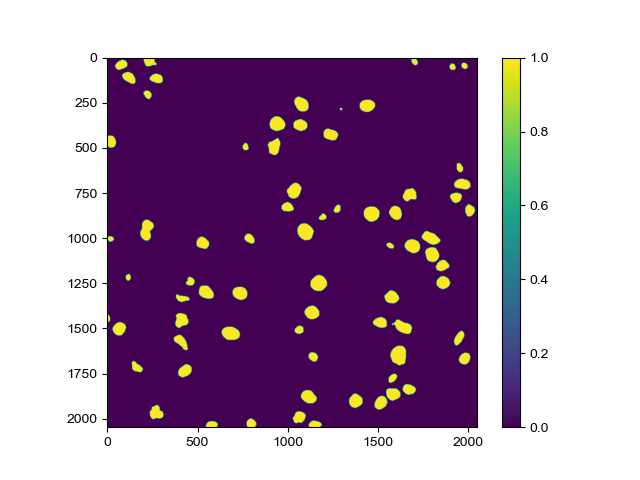

In [70]:
plt.figure()
plt.imshow(masks_2d>0)
plt.colorbar()
plt.show()

In [10]:
# test 3D segmentation
from cellpose import models
model_3d = models.Cellpose(gpu=False, model_type='nuclei')
masks_3d, flows_3d, styles_3d, diams_3d = model.eval(fov.dapi_im[10:30], diameter=50, channels=[0,0], do_3D=True)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
multi-stack tiff read in as having 20 planes 1 channels

 running YX: 20 planes of size (2048, 2048) 




100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:32<00:00,  9.23s/it]



 running ZY: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:21<00:00,  1.49s/it]



 running ZX: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:08<00:00,  1.44s/it]


flows computed 3399.48s
dynamics computed 3416.00s
masks computed 3457.83s
estimated masks for 1 image(s) in 3554.92 sec
>>>> TOTAL TIME 3554.92 sec


In [11]:
masks.shape

(20, 2048, 2048)

In [9]:
import torch
torch.cuda.empty_cache()

In [36]:
del(model)

<IPython.core.display.Javascript object>


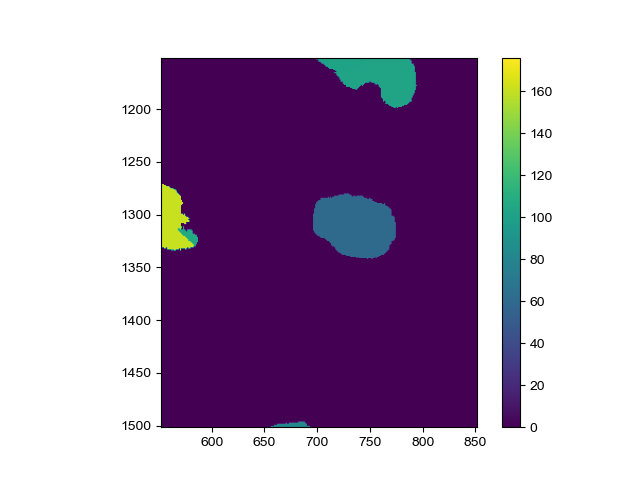

In [13]:
plt.figure()
plt.imshow(masks[10])
plt.colorbar()
plt.show()

In [ ]:
cellposeOutline

In [53]:
import imagedisplay as imdis 

ModuleNotFoundError: No module named 'imagedisplay'

In [ ]:
cellposeOutline = imdis.getMaskBoundaries(masks_cyto)
